In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from visualization_functions import (
    plot_2d_iterates_contours,
    plot_f_val_diffs,
    plot_step_sizes,
    plot_grad_norms,
)
#from gradient_descent_UP import gradient_descent_UP
from globalized_inexact_newton_UP import globalized_inexact_newton_UP
from globalized_newton_UP import globalized_newton_UP
from example_functions import rosenbrock, rand_problem

In [2]:
a = 1
b = 100
rosenbrock_f = lambda x: rosenbrock(a, b, x)[0]
rosenbrock_prime = lambda x: rosenbrock(a, b, x)[1]
rosenbrock_two_prime = lambda x: rosenbrock(a, b, x)[2]

configurations = [
    ([1, 2], 1e-4),
    ([2, 1], 1e-4),
    ([2.5, 2], 1e-4),
    ([0, 4], 1e-4),
]

In [11]:

rosenbrock_histories_ni = []
rosenbrock_labels_ni = []

for configuration in configurations:
    rosenbrock_histories_ni.append(
        globalized_inexact_newton_UP(
            configuration[0],
            rosenbrock_f,
            rosenbrock_prime,
            rosenbrock_two_prime,
            np.identity(2),
            eta_k=lambda _: 1e-3,
            sigma=1e-4,
            eta=.5,
            rho=1e-6,
            p=.1,
            beta=.5,
            eps=1e-10,
            max_iter=100,
        )
    )
    rosenbrock_labels_ni.append(f"x0: {configuration[0]}, sigma:{configuration[1]}")



/home/josua/repos/uni/nlo/w6/truncated_CG.py:21: RuntimeWarning: invalid value encountered in double_scalars
  beta = new_delta/delta


In [6]:

rosenbrock_histories_n = []
rosenbrock_labels_n = []

for configuration in configurations:
    rosenbrock_histories_n.append(
        globalized_newton_UP(
            configuration[0],
            rosenbrock_f,
            rosenbrock_prime,
            rosenbrock_two_prime,
            np.identity(2),
            sigma=1e-4,
            eta=.5,
            rho=1e-6,
            p=.1,
            beta=.5,
            eps=1e-10,
            max_iter=100,
        )
    )
    rosenbrock_labels_n.append(f"x0: {configuration[0]}, sigma:{configuration[1]}")



0


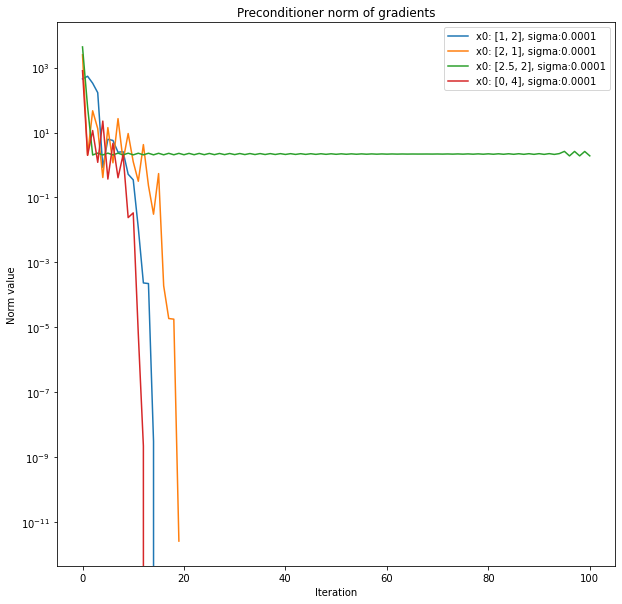

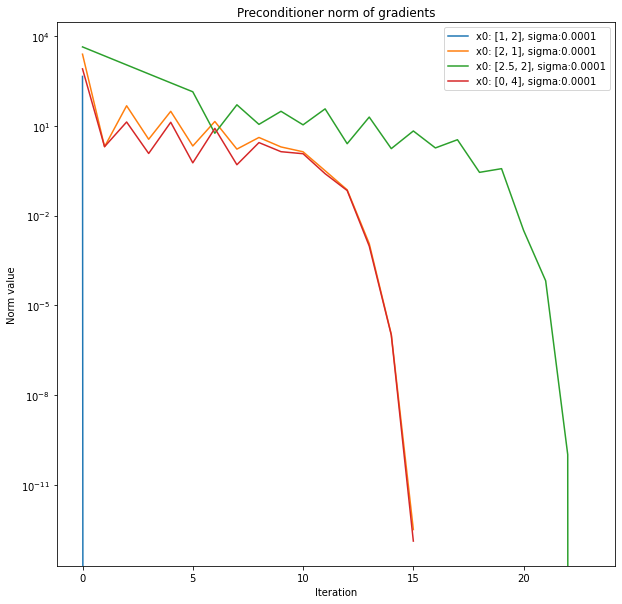

In [8]:
plot_grad_norms(
    histories=rosenbrock_histories_ni,
    labels=rosenbrock_labels_ni,
)
plot_grad_norms(
    histories=rosenbrock_histories_n,
    labels=rosenbrock_labels_n
)
print(0)

0


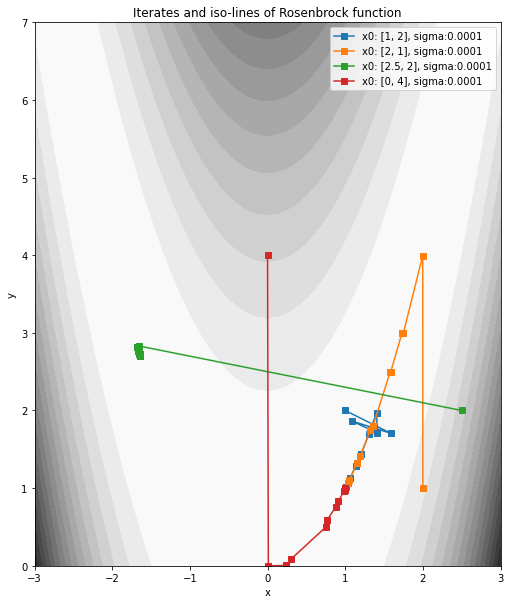

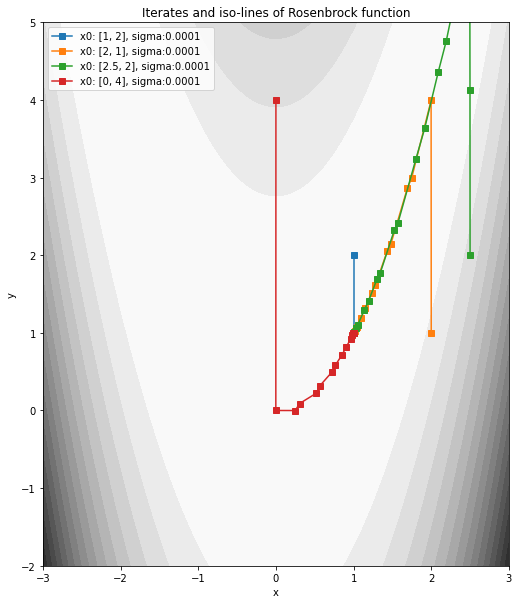

In [12]:
plot_2d_iterates_contours(
    rosenbrock_f,
    histories=rosenbrock_histories_ni,
    labels=rosenbrock_labels_ni,
    xlims=[-3, 3],
    ylims=[0,7],
    title="Iterates and iso-lines of Rosenbrock function"
)
plot_2d_iterates_contours(
    rosenbrock_f,
    histories=rosenbrock_histories_n,
    labels=rosenbrock_labels_n,
    xlims=[-3, 3],
    ylims=[-2,5],
    title="Iterates and iso-lines of Rosenbrock function"
)
print(0)

In [2]:
problem = rand_problem(2)

solve [[0.33588009 0.36920667]
 [0.36920667 0.489476  ]] * x = [-0.14038398 -0.09780899]
solvable -> newton, phi_0=0.15355896402259359, phi_prime_0=-0.02927426097023917 at x=[0.92412054 0.00450625] and d=[-1.16058775  0.67559543]
[1]
0


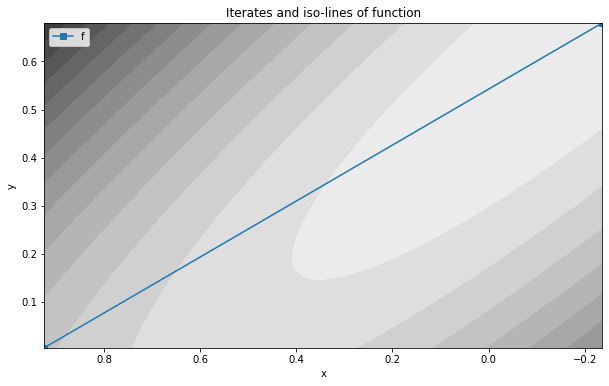

In [3]:
histories = [globalized_newton_UP(problem.x0, problem.f, problem.f_prime, lambda xx: problem.A, np.eye(2), sigma=.01, eta=.5, rho=1e-6, p=.1, beta=.9)]

print(histories[0]['step_lengths'])
xfirst = histories[0]['iterates'][0]
xlast = histories[0]['iterates'][-1]
plot_2d_iterates_contours(problem.f, histories, ['f'], xlims=[xfirst[0],xlast[0]], ylims=[xfirst[1],xlast[1]])
print(0)

0


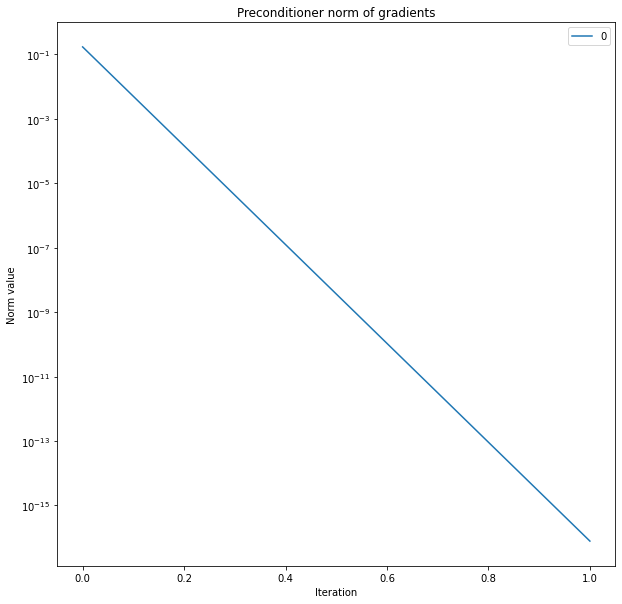

In [4]:
plot_grad_norms(
   histories=histories, labels=range(len(histories))
)  # Gradient norms - gradient descent algorithm
print(0)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0


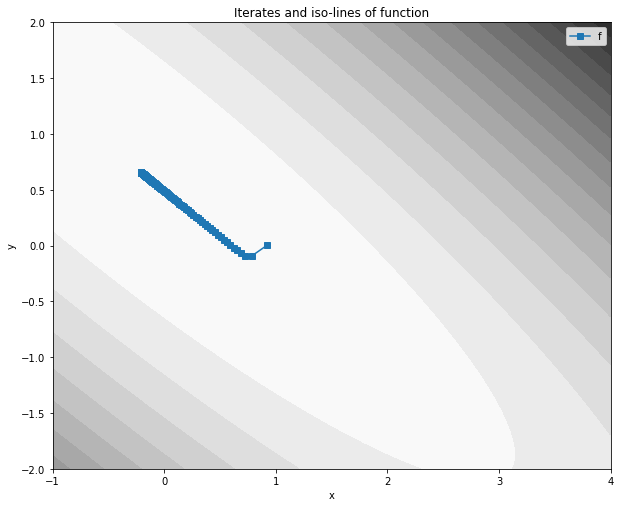

In [5]:
histories = [gradient_descent_UP(problem.x0, problem.f, problem.f_prime,problem.Pinv,sigma=.01, alpha_lower_bound=1, beta=.9)]

print(histories[0]['step_lengths'])
plot_2d_iterates_contours(problem.f, histories, ['f'], xlims=[-1,4], ylims=[-2,2])
print(0)

0


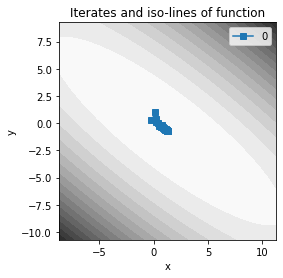

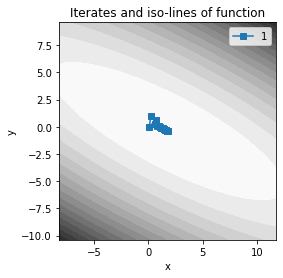

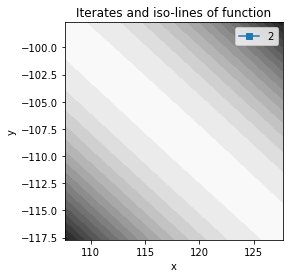

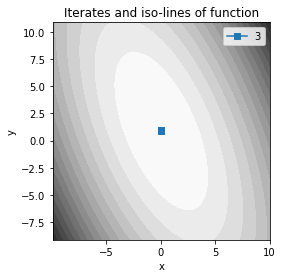

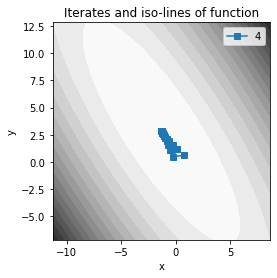

In [83]:
for i, problem in enumerate(problems):
    center = np.linalg.solve(problem.A, problem.b),
    center = list(center)[0]
    plot_2d_iterates_contours(
        problem.f,
        histories=[histories[i]],
        labels=[str(i)],
        xlims = [center[0] - 10, center[0] + 10],
        ylims = [center[1] - 10, center[1] + 10],
    )
print(0)